In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import datasets
from sklearn.model_selection import GridSearchCV

In [11]:
diabetes_db = pd.read_csv('diabetes.csv')
diabetes_db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X = diabetes_db.drop('Outcome', axis=1)
y = diabetes_db['Outcome']

In [13]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

# Seaborn

In [14]:
import seaborn as sns

In [15]:
print(sns.color_palette("pastel").as_hex())
sns.color_palette("pastel")

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

<AxesSubplot:xlabel='Outcome', ylabel='count'>

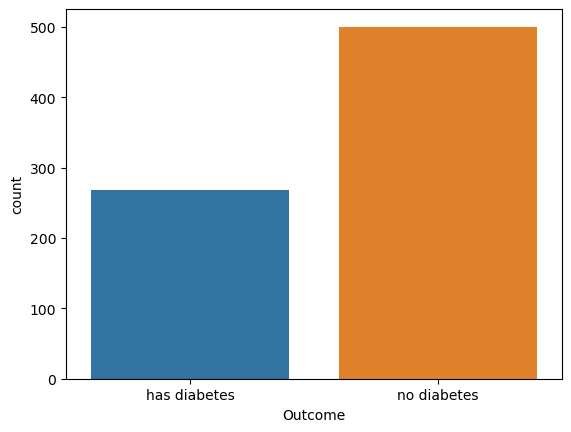

In [16]:
sns.countplot(x=diabetes_db["Outcome"].map({ 0: "no diabetes", 1: "has diabetes"}))

<AxesSubplot:>

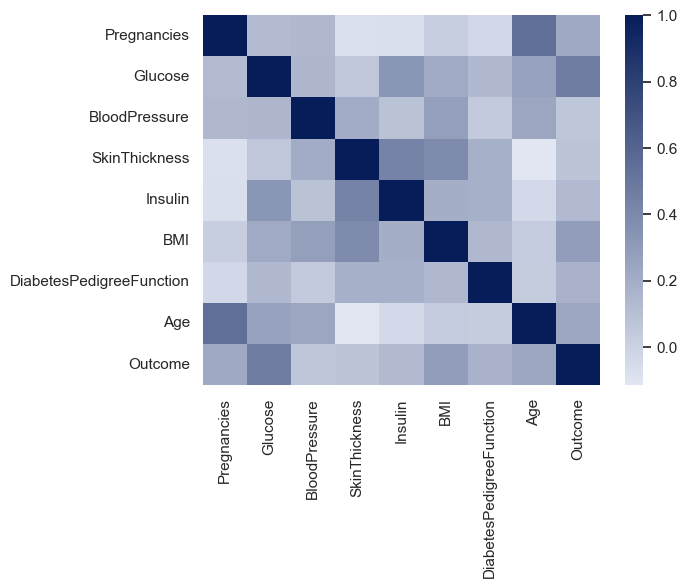

In [23]:
sns.set_theme(style="whitegrid")
sns.heatmap(diabetes_db.corr(), cmap=sns.color_palette("blend:#e1e6f2,#071d59", as_cmap=True))

# Logistic Regression

In [49]:
logModel = LogisticRegression(max_iter=124)

In [50]:
param_grid = [    
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : np.logspace(-4, 4, 20),
        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter' : [ 100, 1000, 2500, 5000 ]
    }
]

In [62]:
clf_logreg = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [52]:
best_clf = clf_logreg.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\trueberryless\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\trueberryless\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trueberryless\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\trueberryless\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _ch

In [53]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='none')

In [54]:
print (f'Accuracy: {best_clf.score(X,y):.3f}')

Accuracy - : 0.783


# Random Forest

In [55]:
clf_ranfor = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=11)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=200)

In [57]:
clf_ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=11)

In [58]:
y_pred = clf_ranfor.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred)

0.8228346456692913